In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN

In [2]:
df=pd.read_csv("df_eda.csv")
df.head()

,Unnamed: 0,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Married,MaritalStatus_Single,Complain_1
0,0,4.0,6.0,3.0,3.0,9.0,11.0,1.0,1.0,5.0,...,0,0,0,1,0,0,0,0,1,1
1,1,1.0,8.0,3.0,4.0,7.0,15.0,0.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,1
2,2,1.0,30.0,2.0,4.0,6.0,14.0,0.0,1.0,3.0,...,1,0,0,0,1,0,0,0,1,1
3,3,0.0,15.0,2.0,4.0,8.0,23.0,0.0,1.0,3.0,...,0,0,0,0,0,0,1,0,1,0
4,4,0.0,12.0,0.5,3.0,3.0,11.0,1.0,1.0,3.0,...,1,0,0,0,0,0,1,0,1,0


In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
x=df.drop('Churn_1',axis=1)
x

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,...,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,SatisfactionScore_2,SatisfactionScore_3,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Married,MaritalStatus_Single,Complain_1
0,4.0,6.0,3.0,3.0,9.0,11.0,1.0,1.0,5.0,159.93,...,0,0,0,1,0,0,0,0,1,1
1,1.0,8.0,3.0,4.0,7.0,15.0,0.0,1.0,0.0,120.90,...,1,0,0,0,1,0,0,0,1,1
2,1.0,30.0,2.0,4.0,6.0,14.0,0.0,1.0,3.0,120.28,...,1,0,0,0,1,0,0,0,1,1
3,0.0,15.0,2.0,4.0,8.0,23.0,0.0,1.0,3.0,134.07,...,0,0,0,0,0,0,1,0,1,0
4,0.0,12.0,0.5,3.0,3.0,11.0,1.0,1.0,3.0,129.60,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,30.0,3.0,2.0,6.0,18.0,1.0,2.0,4.0,150.71,...,0,0,0,0,0,0,0,1,0,0
5626,13.0,13.0,3.0,5.0,6.0,16.0,1.0,2.0,3.0,224.91,...,0,0,0,0,0,0,1,1,0,0
5627,1.0,11.0,3.0,2.0,3.0,21.0,1.0,2.0,4.0,186.42,...,0,0,0,0,0,1,0,1,0,1
5628,23.0,9.0,4.0,5.0,4.0,15.0,2.0,2.0,9.0,178.90,...,0,0,0,0,0,1,0,1,0,0


In [5]:
y=df['Churn_1']
y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn_1, Length: 5630, dtype: int64

In [6]:
y.value_counts()

0    4682
1     948
Name: Churn_1, dtype: int64

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [8]:
sm = SMOTEENN()
xr_train, yr_train = sm.fit_resample(x_train,y_train)

### Decision Tree Classifier

In [9]:
clf=DecisionTreeClassifier()

In [10]:
parameters= {
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [11]:
grid=GridSearchCV(clf,param_grid = parameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [12]:
grid.best_estimator_.get_params()['max_depth']

In [13]:
model_dt=DecisionTreeClassifier(criterion = "entropy")

In [14]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_pred_dt=model_dt.predict(x_test)

In [16]:
model_dt.score(x_test,y_test)

0.9804618117229129

In [17]:
print(classification_report(y_test, y_pred_dt, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       474
           1       0.92      0.96      0.94        89

    accuracy                           0.98       563
   macro avg       0.96      0.97      0.96       563
weighted avg       0.98      0.98      0.98       563



In [18]:
model_dt_smote=DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=6, min_samples_leaf=8)

In [19]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(x_test)
model_score_r = model_dt_smote.score(x_test, y_test)
print(model_score_r)
print(metrics.classification_report(y_test, yr_predict))

0.8454706927175843
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       474
           1       0.51      0.74      0.60        89

    accuracy                           0.85       563
   macro avg       0.73      0.80      0.75       563
weighted avg       0.88      0.85      0.86       563



## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [21]:
parameters= {
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [22]:
grid=GridSearchCV(clf,param_grid = parameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [23]:
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [26]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [27]:
y_pred_rf=model_rf.predict(x_test)

In [28]:
model_rf.score(x_test,y_test)

0.9040852575488455

In [29]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       474
           1       0.97      0.40      0.57        89

    accuracy                           0.90       563
   macro avg       0.94      0.70      0.76       563
weighted avg       0.91      0.90      0.89       563



In [30]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [31]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [32]:
yr_predict1 = model_rf_smote.predict(x_test)

In [33]:
model_score_r1 = model_rf_smote.score(x_test, y_test)

In [34]:
print(model_score_r1)
print(metrics.classification_report(y_test, yr_predict1))

0.8419182948490231
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       474
           1       0.50      0.79      0.61        89

    accuracy                           0.84       563
   macro avg       0.73      0.82      0.76       563
weighted avg       0.88      0.84      0.86       563



##### The results are better in RF Classifier, which gives us accuracy of almost 90%

## K-Nearest Neighbours

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [36]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Error Rate')

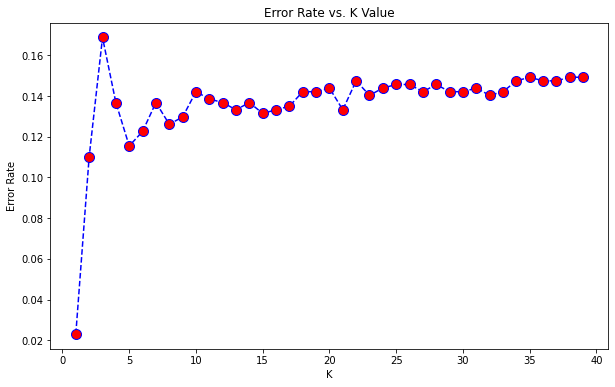

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Choosing K=1

In [38]:
model_knn= KNeighborsClassifier(n_neighbors=1)
model_knn.fit(x_train,y_train)
y_pred_knn= model_knn.predict(x_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
model_knn.score(x_test,y_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9769094138543517

In [40]:
print(classification_report(y_test, y_pred_knn, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       474
           1       0.95      0.90      0.92        89

    accuracy                           0.98       563
   macro avg       0.97      0.95      0.96       563
weighted avg       0.98      0.98      0.98       563



In [41]:
model_knn_smote= KNeighborsClassifier(n_neighbors=1)
model_knn_smote.fit(xr_train,yr_train)
yr_pred1= model_knn_smote.predict(x_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [42]:
model_knn_smote.score(x_test,y_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8188277087033747

In [43]:
print(metrics.classification_report(y_test, yr_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       474
           1       0.46      0.89      0.61        89

    accuracy                           0.82       563
   macro avg       0.72      0.85      0.74       563
weighted avg       0.89      0.82      0.84       563



## Support Vector Machine(SVM)

In [44]:
param_grid = {'kernel': ['rbf','linear']}
 
grid = GridSearchCV(svm.SVC(), param_grid, cv=10, verbose=3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END .......................kernel=rbf;, score=0.830 total time=   1.3s
[CV 2/10] END .......................kernel=rbf;, score=0.830 total time=   1.5s
[CV 3/10] END .......................kernel=rbf;, score=0.830 total time=   1.1s
[CV 4/10] END .......................kernel=rbf;, score=0.830 total time=   1.1s
[CV 5/10] END .......................kernel=rbf;, score=0.830 total time=   1.0s
[CV 6/10] END .......................kernel=rbf;, score=0.830 total time=   1.1s
[CV 7/10] END .......................kernel=rbf;, score=0.830 total time=   1.4s
[CV 8/10] END .......................kernel=rbf;, score=0.832 total time=   1.3s
[CV 9/10] END .......................kernel=rbf;, score=0.830 total time=   1.4s
[CV 10/10] END ......................kernel=rbf;, score=0.830 total time=   1.6s
[CV 1/10] END ....................kernel=linear;, score=0.880 total time=  23.8s
[CV 2/10] END ....................kernel=linear;

GridSearchCV(cv=10, estimator=SVC(), param_grid={'kernel': ['rbf', 'linear']},
             verbose=3)

In [45]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'linear'}
SVC(kernel='linear')


In [46]:
model_svm= svm.SVC(kernel='linear')

In [47]:
model_svm.fit(x_train,y_train)
y_pred_svm= model_svm.predict(x_test)

In [48]:
model_svm.score(x_test,y_test)

0.9218472468916519

In [49]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       474
           1       0.85      0.62      0.71        89

    accuracy                           0.92       563
   macro avg       0.89      0.80      0.83       563
weighted avg       0.92      0.92      0.92       563



In [50]:
model_svm_smote=svm.SVC(kernel='linear')
model_svm_smote.fit(xr_train,yr_train)
yr_pred1= model_svm_smote.predict(x_test)

In [51]:
model_svm_smote.score(x_test,y_test)

0.827708703374778

In [52]:
print(metrics.classification_report(y_test, yr_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       474
           1       0.47      0.82      0.60        89

    accuracy                           0.83       563
   macro avg       0.72      0.82      0.75       563
weighted avg       0.88      0.83      0.84       563



### Using Stacking classifier

In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
estimators= [
           ('knn',model_knn_smote),
           ('svm',model_svm_smote),
           ('rf',model_rf_smote),
           ('dt',model_dt_smote) ]

In [55]:
stack_model = StackingClassifier(estimators=estimators, final_estimator= LogisticRegression())

In [56]:
stack_model.fit(xr_train, yr_train)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('svm', SVC(kernel='linear')),
                               ('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_leaf=8,
                                                       random_state=100)),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       min_samples_leaf=8,
                                                       random_state=100))],
                   final_estimator=LogisticRegression())

In [57]:

y_test_pred= stack_model.predict(x_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [58]:
stack_model.score(x_test,y_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8188277087033747

In [59]:
print(classification_report(y_test, y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       474
           1       0.46      0.89      0.61        89

    accuracy                           0.82       563
   macro avg       0.72      0.85      0.74       563
weighted avg       0.89      0.82      0.84       563



In [60]:
estimators_ws= [
           ('knn',model_knn),
           ('svm',model_svm),
           ('rf',model_rf),
           ('dt',model_dt) ]

In [61]:
stack_model_withoutsmote = StackingClassifier(estimators=estimators_ws, final_estimator= LogisticRegression())

In [62]:
stack_model_withoutsmote.fit(x_train, y_train)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('svm', SVC(kernel='linear')),
                               ('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_leaf=8,
                                                       random_state=100)),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy'))],
                   final_estimator=LogisticRegression())

In [63]:
y_test_pred1= stack_model_withoutsmote.predict(x_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [64]:
stack_model_withoutsmote.score(x_test,y_test)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9911190053285968

In [65]:
print(classification_report(y_test, y_test_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       474
           1       1.00      0.94      0.97        89

    accuracy                           0.99       563
   macro avg       0.99      0.97      0.98       563
weighted avg       0.99      0.99      0.99       563



In [66]:
 from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
    false_positive_ratest, true_positive_ratest, thresholdst = roc_curve(y_test, y_test_pred1)
    false_positive_rateknn, true_positive_rateknn, thresholdknn = roc_curve(y_test, y_pred_knn)
    false_positive_ratesvm, true_positive_ratesvm, thresholdsvm = roc_curve(y_test, y_pred_svm)
    false_positive_ratedt, true_positive_ratedt, thresholddt = roc_curve(y_test, y_pred_dt)
    false_positive_raterf, true_positive_raterf, thresholdrf = roc_curve(y_test, y_pred_rf)
    

In [68]:
print('roc_auc_score Stacking', roc_auc_score(y_test, y_test_pred1))
print('roc_auc_score KNN', roc_auc_score(y_test, y_pred_knn))
print('roc_auc_score SVM', roc_auc_score(y_test, y_pred_svm))
print('roc_auc_score DT', roc_auc_score(y_test, y_pred_dt))
print('roc_auc_score RF', roc_auc_score(y_test, y_pred_rf))

roc_auc_score Stacking 0.9719101123595506
roc_auc_score KNN 0.9452187929644905
roc_auc_score SVM 0.7984402408381929
roc_auc_score DT 0.9701441236429146
roc_auc_score RF 0.7011923386905609


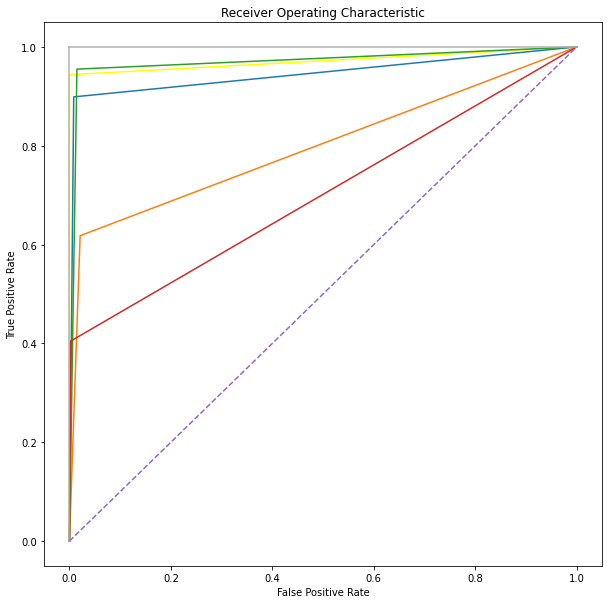

In [69]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_ratest, true_positive_ratest, label='Stacking',color="yellow")
    plt.plot(false_positive_rateknn, true_positive_rateknn, label='KNN')
    plt.plot(false_positive_ratesvm, true_positive_ratesvm, label='SVM')
    plt.plot(false_positive_ratedt, true_positive_ratedt, label='DT')
    plt.plot(false_positive_raterf, true_positive_raterf, label='RF')
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [70]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [71]:
print(f1_score(y_test, y_test_pred1))
print(f1_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_dt))
print(f1_score(y_test, y_pred_rf))

0.9710982658959537
0.9248554913294796
0.7142857142857143
0.9392265193370166
0.5714285714285715


In [72]:
print(recall_score(y_test, y_test_pred1))
print(recall_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_rf))

0.9438202247191011
0.898876404494382
0.6179775280898876
0.9550561797752809
0.4044943820224719


In [73]:
print(accuracy_score(y_test, y_test_pred1))
print(accuracy_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_rf))

0.9911190053285968
0.9769094138543517
0.9218472468916519
0.9804618117229129
0.9040852575488455


In [74]:
print(precision_score(y_test, y_test_pred1))
print(precision_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_rf))

1.0
0.9523809523809523
0.8461538461538461
0.9239130434782609
0.972972972972973


## Now seeing 10 fold cross validation of Stacking Classifier

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(stack_model_withoutsmote, x_train, y_train,scoring="accuracy", cv=10)
print(scores)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0.96646943 0.97435897 0.98027613 0.96646943 0.97435897 0.96844181
 0.97830375 0.98221344 0.96837945 0.96837945]


In [77]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.01


In [78]:
scores1 = cross_val_score(stack_model_withoutsmote, x_train, y_train,scoring="f1", cv=10)
print(scores1)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0.89156627 0.91666667 0.94047619 0.88505747 0.92485549 0.91860465
 0.94252874 0.94047619 0.90243902 0.89440994]


c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [79]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.92 accuracy with a standard deviation of 0.02


In [80]:
scores2 = cross_val_score(stack_model_withoutsmote, x_train, y_train,scoring="recall", cv=10)
print(scores2)

c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0.88372093 0.88372093 0.94186047 0.89534884 0.93023256 0.89534884
 0.91860465 0.92941176 0.84883721 0.86046512]


c:\users\shashy123\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [81]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.90 accuracy with a standard deviation of 0.03
